# Демозаикинг

***

In [ ]:
# if not installed
# !pip install colour-demosaicing==0.2.6

In [1]:
# нужно, чтобы cv2 открывал exr изображения
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

In [2]:
from pathlib import Path

import cv2

import colour

from colour_demosaicing import (
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

import matplotlib.pyplot as plt
import numpy as np

In [3]:
LIGHTHOUSE_IMG_PATH = "data/lighthouse.exr"

if not Path(LIGHTHOUSE_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2025.git
    !mv cv_course_2025/seminars/seminar_02/data .

In [4]:
rgb_img = cv2.imread(LIGHTHOUSE_IMG_PATH, cv2.IMREAD_UNCHANGED)[:, :, ::-1]
rgb_img = colour.cctf_encoding(rgb_img)
rgb_img.dtype

dtype('float64')

In [5]:
rgb_img.shape

(768, 512, 3)

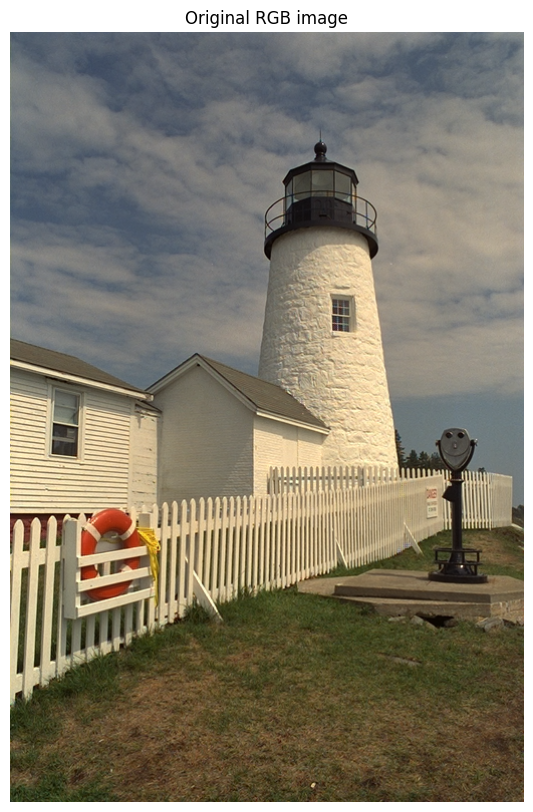

In [6]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Original RGB image")
plt.imshow(rgb_img);

In [7]:
mosaiced_image = mosaicing_CFA_Bayer(rgb_img, pattern="RGGB")
mosaiced_image.shape

(768, 512)

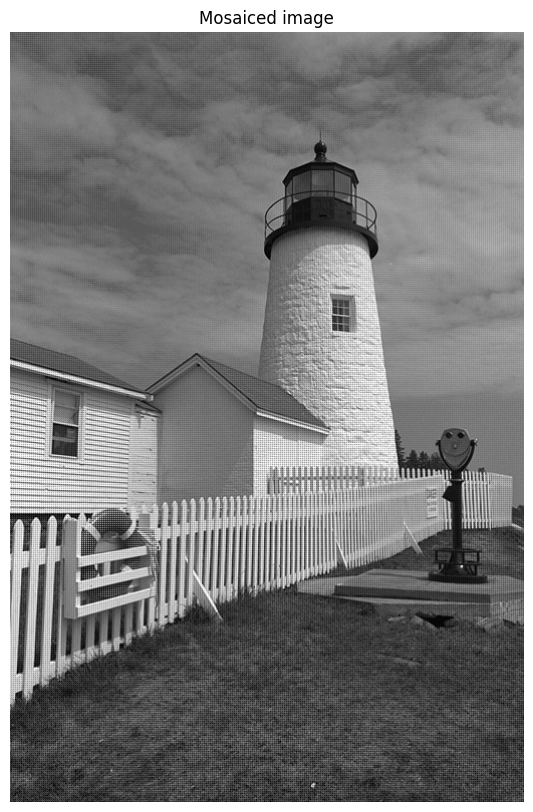

In [8]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Mosaiced image")
plt.imshow(mosaiced_image, cmap="gray");

In [9]:
def separate_chanel_rggb(img):
    new_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=img.dtype)
    new_img[0::2, 0::2, 0] = img[0::2, 0::2]  # R
    new_img[0::2, 1::2, 1] = img[0::2, 1::2]  # G1
    new_img[1::2, 0::2, 1] = img[0::2, 1::2]  # G2
    new_img[1::2, 1::2, 2] = img[0::2, 1::2]  # B
    return new_img

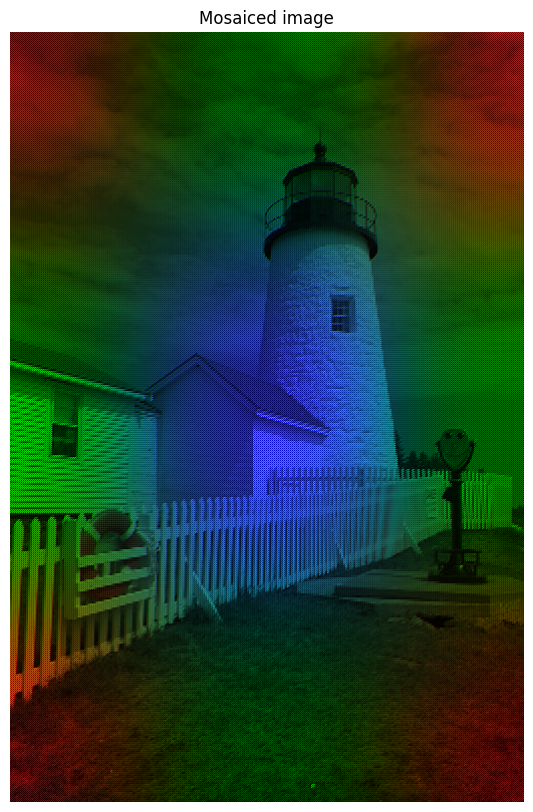

In [10]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Mosaiced image")
plt.imshow(separate_chanel_rggb(mosaiced_image));

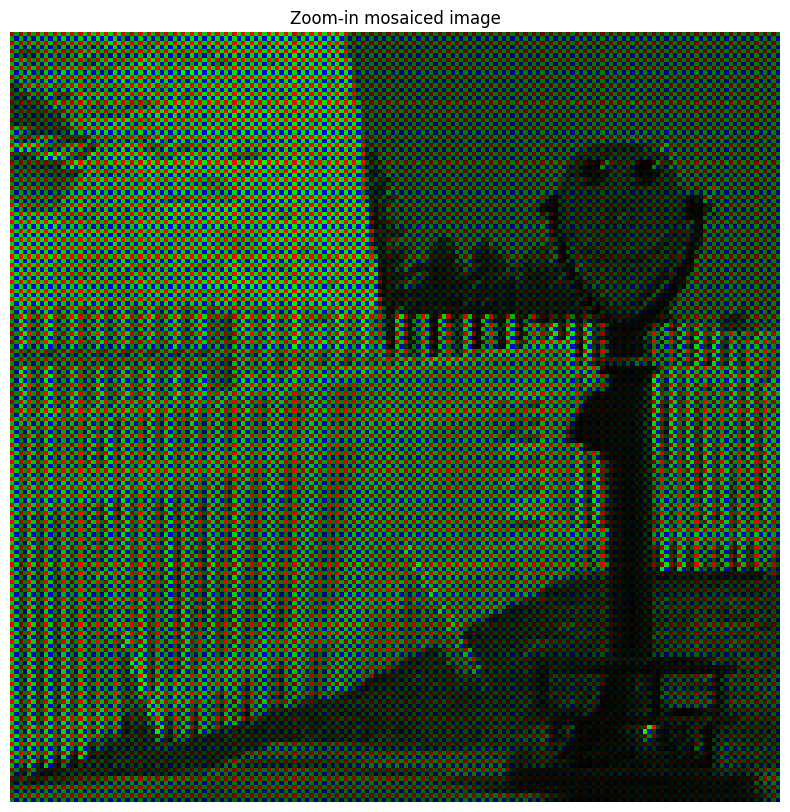

In [11]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Zoom-in mosaiced image")
plt.imshow(separate_chanel_rggb(mosaiced_image)[370:550, 300:480]);

# Bilinear

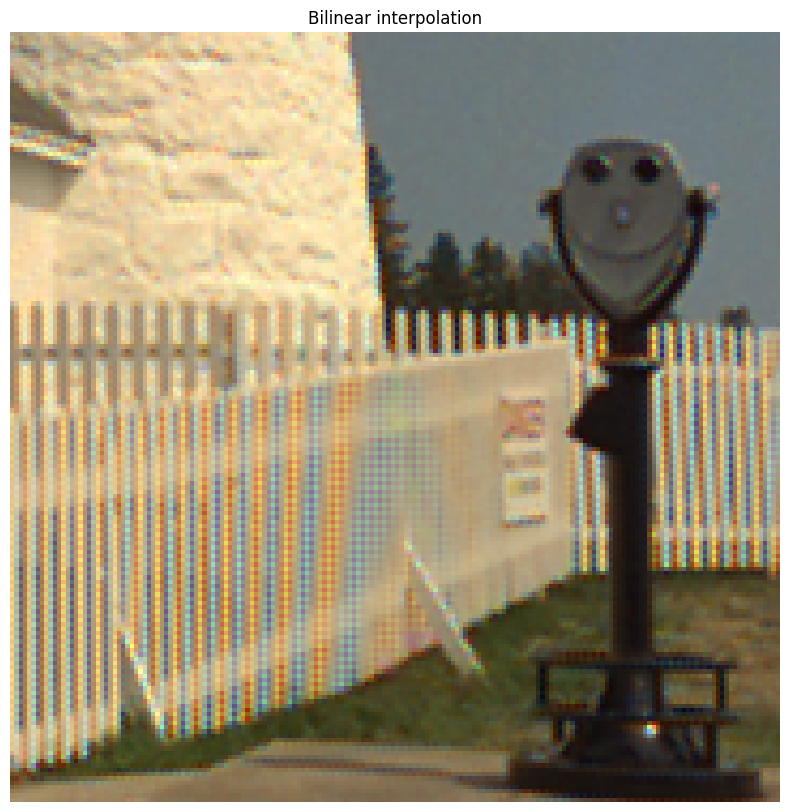

In [12]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Bilinear interpolation")
plt.imshow(demosaicing_CFA_Bayer_bilinear(mosaiced_image)[370:550, 300:480]);

# Malvar (2004)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.150967075323..1.13555307103].


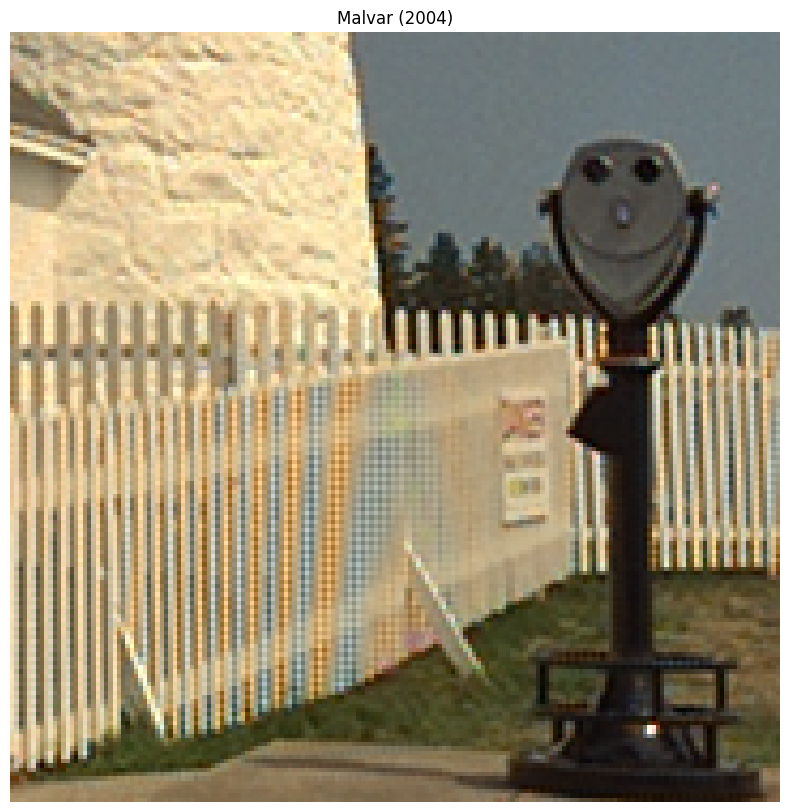

In [13]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Malvar (2004)")
plt.imshow(demosaicing_CFA_Bayer_Malvar2004(mosaiced_image)[370:550, 300:480]);

# Menon (2007)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0763961363791..1.0977723342].


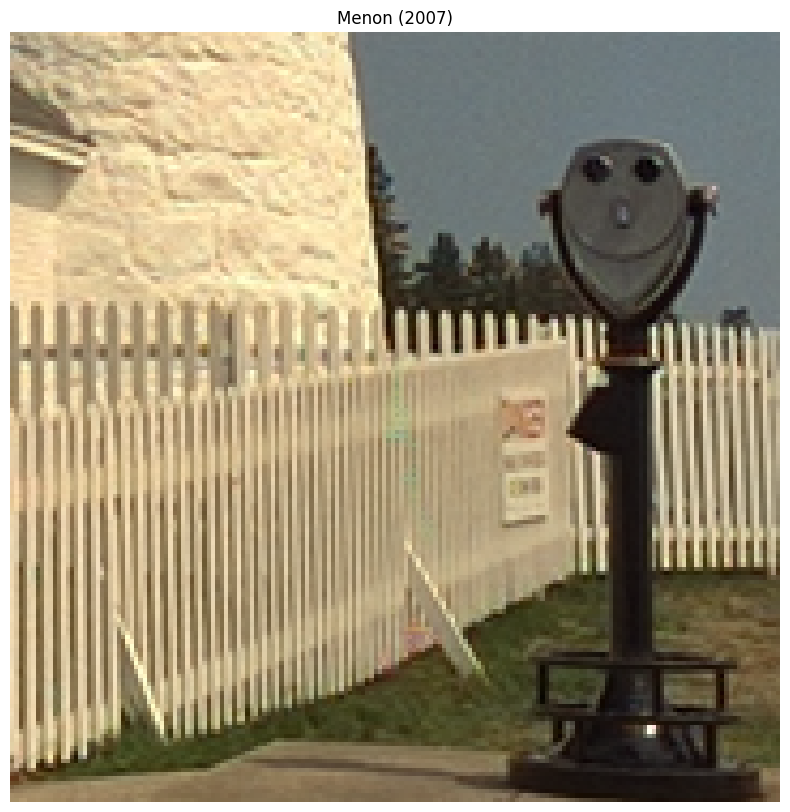

In [14]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Menon (2007)")
plt.imshow(demosaicing_CFA_Bayer_Menon2007(mosaiced_image)[370:550, 300:480]);

# Домашнее задание (опциональное, неоцениваемое)

Вы часто будете сталкиваться с изображениями в RAW-формате при работе с индустриальными камерами и датасетами в области робототехники и беспилотного транспорта.

Например, датасет Oxford RobotCar содержит изображения в формате Bayer GBRG 8-bit (для камеры stereo).

In [15]:
OXFORD_SAMPLE_1_PATH = "data/oxford_robotcar_sample_1.png"
OXFORD_SAMPLE_2_PATH = "data/oxford_robotcar_sample_2.png"

if not Path(OXFORD_SAMPLE_1_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2025.git
    !mv cv_course_2025/seminars/seminar_02/data .

In [16]:
oxford_img_1 = cv2.imread(OXFORD_SAMPLE_1_PATH, cv2.IMREAD_UNCHANGED)
oxford_img_2 = cv2.imread(OXFORD_SAMPLE_2_PATH, cv2.IMREAD_UNCHANGED)

oxford_img_1.shape, oxford_img_1.dtype

((960, 1280), dtype('uint8'))

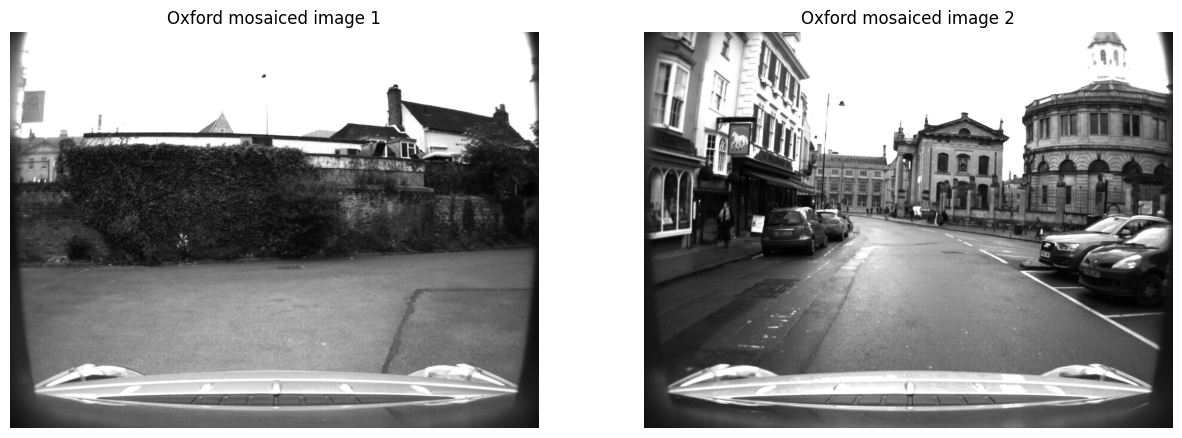

In [17]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Oxford mosaiced image 1")
plt.imshow(oxford_img_1, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Oxford mosaiced image 2")
plt.imshow(oxford_img_2, cmap="gray");

## Задание

Попробуйте разные алгоритмы демозаикинга на изображениях из RobotCar. Найдите участки с артефактами и сравните их между собой.